# <center>Pycon Estonia 2023 : How to use Pandas Efficiently </center>

### Github Repository :  <a href="bit.ly/github_pycon2023">bit.ly/github_pycon2023 </a>
### Google Colab :  <a href ="bit.ly/gcolab_pycon2023"> bit.ly/gcolab_pycon2023</a>
### Survey: <a href="https://bit.ly/3RdZ8cj"> bit.ly/survey2023_pandas </a>

We will be using the following dataset for this tutorial :<br>
- IMDB top 1000 Movie Dataset (kaggle)<br> https://www.kaggle.com/datasets/mysarahmadbhat/imdb-top-1000-movies
- Bank Marketing Dataset (UCI) https://archive.ics.uci.edu/ml/datasets/bank+marketing <br>
- Bike Sharing dataset (Kaggle) https://www.kaggle.com/datasets/yasserh/bike-sharing-dataset

While you are waiting for the tutorial to start, you can go through above link to download dataset and Notebook :<br>
N.B. : If you do not have Python installed on your system, you can use Google Colab to run the notebook.


### PART 1 :Pandas Big Picture

What is Pandas?<br>


<img src="https://github.com/h0ssein2011/Pydata_Yerevan_22/blob/main/img/Excel_Vs_Pandas.jpg?raw=true" width="550" height="200" style ="float:center" >

### Why pandas?
-  easy to use
-  easy to learn.
- it is fast
- it is a powerful data analysis toolkit
- it is open source
- it is supported by many developers (~3k)


### Two building blocks of pandas are **Series** and **DataFrame**
- ***Series***: A 1D labeled data structure with rows.
- ***DataFrame***: A 2D labeled data structure with columns and rows.


In [46]:
import pandas as pd
print(pd.__version__)
# !pip install --upgrade pandas
# Restart the Kernel to see updated version


2.1.0


In [47]:
#import required libraries
import numpy as np
from matplotlib import pyplot as plt

In [89]:
# read top 1000 imdb movie dataset of the dataset
imdb_url = 'https://raw.githubusercontent.com/h0ssein2011/Pycon_Estonia_2023/main/data/imdb_1000.csv'
imdb = pd.read_csv(imdb_url)
imdb.head(10)


,Name,Year,duration,Rating,Meta_score,Votes,Director,cast,Gross,genre
0,The Shawshank Redemption,1994,142,9.3,80.0,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34,Drama
1,The Godfather,1972,175,9.2,100.0,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97,Crime
2,The Dark Knight,2008,152,9.0,84.0,2341261,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86,Action
3,The Godfather: Part II,1974,202,9.0,90.0,1146666,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",57.30,Crime
4,12 Angry Men,1957,96,9.0,96.0,701882,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",4.36,Crime
5,The Lord of the Rings: The Return of the King,2003,201,8.9,94.0,1663902,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",377.85,Action
6,Pulp Fiction,1994,154,8.9,94.0,1852195,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",107.93,Crime
7,Schindler's List,1993,195,8.9,94.0,1229549,Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro...",96.90,Biography
8,Inception,2010,148,8.8,74.0,2099854,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",292.58,Action
9,Fight Club,1999,139,8.8,66.0,1881336,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier",37.03,Drama


In [50]:
# check the type of the dataset / columns
type(imdb)


pandas.core.frame.DataFrame

In [51]:
imdb.dtypes


Name           object
Year            int64
duration        int64
Rating        float64
Meta_score    float64
Votes           int64
Director       object
cast           object
Gross         float64
genre          object
dtype: object

In [52]:
# Series sample
print(type(imdb.Rating))
print('this is a Series sample \n ')
imdb.Rating

<class 'pandas.core.series.Series'>
this is a Series sample 
 


0      9.3
1      9.2
2      9.0
3      9.0
4      9.0
      ... 
995    7.6
996    7.6
997    7.6
998    7.6
999    7.6
Name: Rating, Length: 1000, dtype: float64

### Row /column Selection

In [53]:
#Select Rows
imdb.loc[2:10,:]


,Name,Year,duration,Rating,Meta_score,Votes,Director,cast,Gross,genre
2,The Dark Knight,2008,152,9.0,84.0,2341261,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86,Action
3,The Godfather: Part II,1974,202,9.0,90.0,1146666,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",57.30,Crime
4,12 Angry Men,1957,96,9.0,96.0,701882,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",4.36,Crime
5,The Lord of the Rings: The Return of the King,2003,201,8.9,94.0,1663902,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",377.85,Action
6,Pulp Fiction,1994,154,8.9,94.0,1852195,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",107.93,Crime
7,Schindler's List,1993,195,8.9,94.0,1229549,Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro...",96.90,Biography
8,Inception,2010,148,8.8,74.0,2099854,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",292.58,Action
9,Fight Club,1999,139,8.8,66.0,1881336,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier",37.03,Drama
10,The Lord of the Rings: The Fellowship of the Ring,2001,178,8.8,92.0,1683989,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",315.54,Action


In [54]:
#Select Columns
imdb.loc[:,['Name','Year']]


,Name,Year
0,The Shawshank Redemption,1994
1,The Godfather,1972
2,The Dark Knight,2008
3,The Godfather: Part II,1974
4,12 Angry Men,1957
...,...,...
995,Breakfast at Tiffany's,1961
996,Giant,1956
997,From Here to Eternity,1953
998,Lifeboat,1944


In [55]:
# Select with iloc
imdb.iloc[-4:,4:]


,Meta_score,Votes,Director,cast,Gross,genre
996,84.0,34594,George Stevens,"Elizabeth Taylor, Rock Hudson, James Dean, Car...",NaN,Drama
997,85.0,43868,Fred Zinnemann,"Burt Lancaster, Montgomery Clift, Deborah Kerr...",30.5,Drama
998,78.0,26791,Alfred Hitchcock,"Tallulah Bankhead, John Hodiak, Walter Slezak,...",NaN,Drama
999,93.0,52688,Alfred Hitchcock,"Robert Donat, Madeleine Carroll, Lucie Mannhei...",NaN,Crime


In [56]:
# Use np.where
imdb['has_high_rating'] = np.where(imdb.Rating > 8 ,'High','low')
imdb.head()

,Name,Year,duration,Rating,Meta_score,Votes,Director,cast,Gross,genre,has_high_rating
0,The Shawshank Redemption,1994,142,9.3,80.0,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34,Drama,High
1,The Godfather,1972,175,9.2,100.0,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97,Crime,High
2,The Dark Knight,2008,152,9.0,84.0,2341261,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86,Action,High
3,The Godfather: Part II,1974,202,9.0,90.0,1146666,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",57.30,Crime,High
4,12 Angry Men,1957,96,9.0,96.0,701882,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",4.36,Crime,High


In [58]:
# use Value_Counts to counts number of rows and normalize=True to conevert to %
imdb.has_high_rating.value_counts(normalize=False)


has_high_rating
low     672
High    328
Name: count, dtype: int64

In [59]:
imdb.describe()

,Year,duration,Rating,Meta_score,Votes,Gross
count,1000.000000,1000.000000,1000.000000,772.000000,1.000000e+03,830.000000
mean,1991.260000,123.157000,7.952100,80.389896,2.778164e+05,67.977325
std,23.355125,28.364536,0.274209,9.825035,3.321972e+05,109.851739
min,1920.000000,45.000000,7.600000,61.000000,2.510000e+04,0.000000
25%,1976.000000,103.000000,7.700000,73.000000,5.594225e+04,3.192500
50%,1999.000000,119.000000,7.900000,80.000000,1.407235e+05,23.250000
75%,2009.250000,137.000000,8.100000,88.000000,3.792305e+05,80.875000
max,2021.000000,321.000000,9.300000,100.000000,2.377480e+06,936.660000


### Basic operations in Pandas


In [60]:
# print some basic information about the dataset
print(imdb.Year.max())
print(imdb.duration.mean())


2021
123.157


### **Notes**:
#### 1- Convert **Business problems** to ***questions and answer them*** with Data by Pandas insetad of Jumping to the analysis without knowing what you are looking for or your dataset in hand <br>
#### 2- **Relation does not mean causation**. Here we just find the relationship is present in the data.(Causation needs more domain knowledge)  <br>
#### 3- There **more than one way** to do something in Pandas. <br>
#### 4- Data is not always **clean**. We need to clean it before analysis. <br>
Q1 : What is the trend of Years in which movies are released? <br>
Q2 : Which Genre had the highest number of movies among top 1000 movies dataset? <br>
Q3 : What is the distribution of Duration (In every 10 minutes) in the top 1000 movies? <br>
Q4 : what is the average duration of each genre?    <br>
Q5 : Was there an increase of Votes over the time ? <br>
Q6 : For each year what was the average rating and the maximum of Meta score? <br>


#### Practice 1:
How many of movies got rating between 7.5 and 8.5? (Hint:use value_counts() method) <br>
What is trend of Gross Earning over the years? (Hint: use groupby() method) <br>
what is the distibution of meta score in every 10 points? (Hint: use cut() method) <br>
How many cast are there in each movie? (Hint: use apply() method) <br>

<Axes: xlabel='Year'>

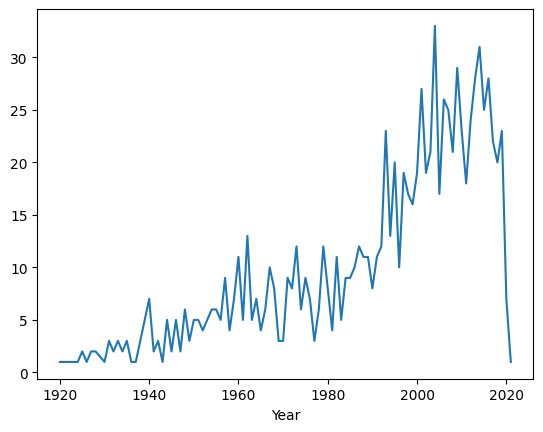

In [70]:
#What is the trend of Years in which movies are released? -- these are top movies maybe technology helps to have better movies!
imdb.Year.value_counts().sort_index().plot()

# remove last year value as data is not completed
# imdb.Year.value_counts().sort_index()[:-2].plot()
# plt.show()


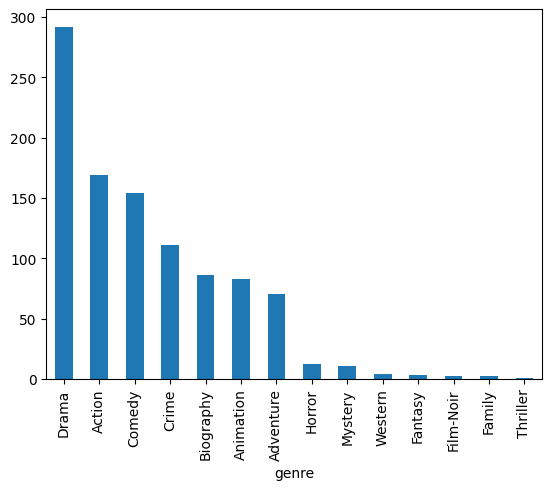

In [82]:
#Which Genre had the highest number of movies among top 1000 movies dataset?
imdb.genre.value_counts().plot(kind='bar')
# imdb.genre.value_counts(normalize=True).plot(kind='bar')
plt.show()



number of bins : 20 , number of labels 19


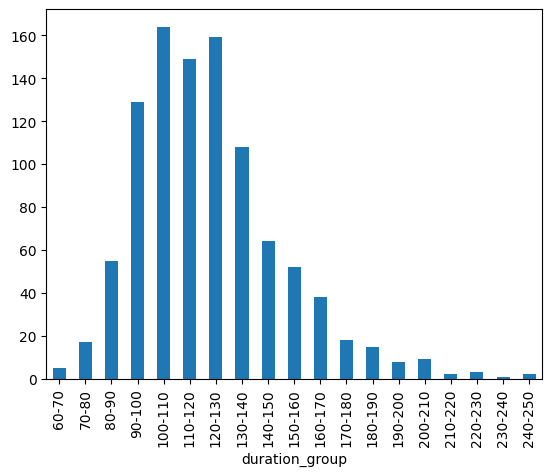

In [ ]:
# What is the distribution of Duration (In every 10 minutes) in the top 1000 movies?
# way 1:
bins = [60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]
labels = ['60-70','70-80','80-90','90-100','100-110','110-120','120-130','130-140','140-150','150-160','160-170','170-180','180-190','190-200','200-210','210-220','220-230','230-240','240-250']
# Number of labels should be exactly 1 lower than bins
print(f'number of bins : {len(bins)} , number of labels {len(labels)}')
imdb['duration_group'] = pd.cut(imdb.duration ,bins=bins,labels=labels)
imdb.duration_group.value_counts().sort_index().plot(kind='bar')
plt.show()



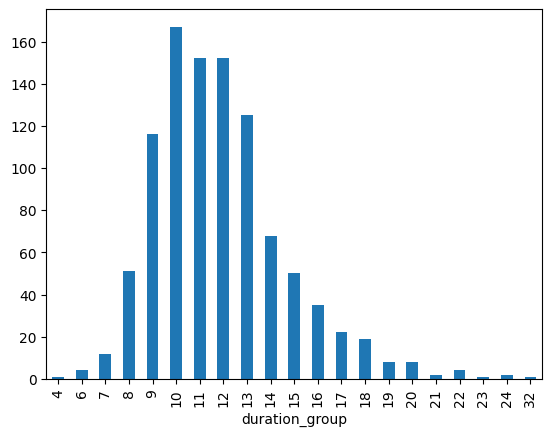

In [ ]:
# way 2: using math functions
  imdb['duration_group'] = imdb.duration // 10
imdb.duration_group.value_counts().sort_index().plot(kind='bar')
plt.show()


<Axes: xlabel='genre'>

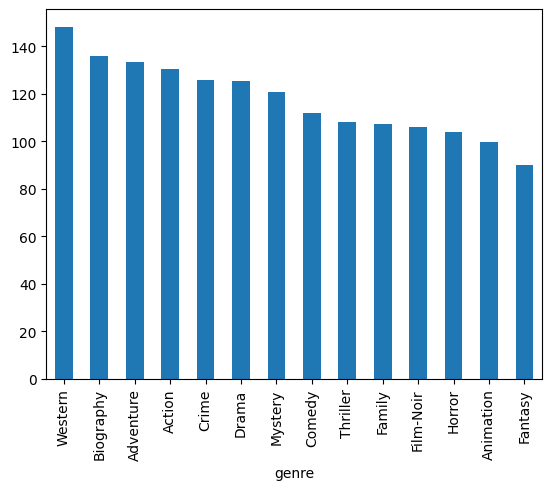

In [88]:
# what is the average duration of each genre?
imdb.groupby('genre')['duration'].mean().sort_values(ascending = False).plot(kind='bar')


In [ ]:
# Was there an increase of Votes over the time ?


In [ ]:
# For each year what was the average rating and the maximum of Meta score?


In [ ]:
# For each year what was the average rating and the maximum of Meta score?(with Pivot table)


### Part II : How to use Pandas More effiently

### Most Data Analyst/Scientists use this kind of code style while they do not how to use Pandas efficiently.!

<img src="https://github.com/h0ssein2011/Pydata_Yerevan_22/blob/main/img/Screenshot1.jpg?raw=true" width="750" height="500" style ="float:middle" ><br>
<br>
<img src="https://github.com/h0ssein2011/Pydata_Yerevan_22/blob/main/img/Screenshot2.jpg?raw=true" width="750" height="500" style ="float:left" >


# Thanks to Matt Harrison Author of "**Effective Pandas**" book and many courses.
You can find his other books and courses here and also his youtube videos

[store.metasnake.com](https://store.metasnake.com/)

[Youtube](https://www.youtube.com/watch?v=UURvPeczxJI)

### Use chaining instead of classic coding
 ### what is Chainning?
 Chaining allows you to express the idea of data flowing through a pipeline almost 1-to-1 into your code, making your code more readable both for yourself and for others. <br>
<br>
<img src="https://github.com/h0ssein2011/Pydata_Yerevan_22/blob/main/img/Chaining.png?raw=true" width="750" height="200"> <br>
*source :www.aaa-riskfinance.es/publicaties/chaining-in-python-and-r/

#### 1- Benefit of usnig chaining in your codes
- It is more readable and understandable
- It can save you a lot of time
- It is more pythonic
- It is more fun!


In [90]:
# read Bank dataset
bank_url = 'https://raw.githubusercontent.com/h0ssein2011/Pycon_Estonia_2023/main/data/bank-full.csv'
bank = pd.read_csv(bank_url,sep=';')
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


nput variables:<br>
**bank client data:**<br>
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>

**related with the last contact of the current campaign:**<br>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**   <br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

**social and economic context attributes**<br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

**Output variable (desired target):**<br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>

<Axes: xlabel='job'>

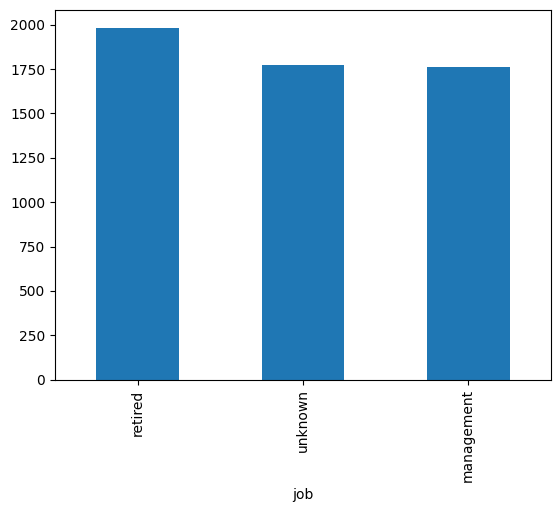

In [75]:
# An example of using chaining methods to get the result in differnt lines seprated by "."
# Question : What are top 3 jobs with highest Loan request in this dataset?
(bank
 .groupby('job')
 .balance
 .mean()
 .sort_values(ascending=False)[:3]
 .plot(kind='bar')
)



# Again Ask Questions and Answer them with Data by Pandas
Q1 : What is the distribution of age(in every decade in data set? <br>
Q2 : Is there relation between age group and balance? <br>
Q3 : Is there relation between marital status and balance? <br>
Q4 : Is there relation between education and balance? <br>
Q5 : Is there relation between occupation and balance? <br>
Q6 : Which job had more default? <br>
Q7 : Which education level had more balance? <br>



#### Do Preprocessing

In [76]:
# clean the dataset function and use chaining technique
def clean_df(df_):
  return(df_
         .replace('unknown',np.nan)
          .replace('yes',1)
          .replace('no',0)
         )
bank = clean_df(bank)
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,0,29,1,0,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,0,2,1,1,NaN,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,0,1506,1,0,NaN,5,may,92,1,-1,0,NaN,0
4,33,NaN,single,NaN,0,1,0,0,NaN,5,may,198,1,-1,0,NaN,0


In [77]:
# get null values
bank.isnull().sum() *100 / bank.shape[0]

age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
y             0.000000
dtype: float64

In [78]:
# clean the dataset function with fillna and assign
def clean_df(df_):
  return(df_
         .replace('unknown',np.nan)
          .replace('yes',1)
          .replace('no',0)
          # replace null values with most common value in the dataset
          .assign(job=lambda x:x.job.fillna(x.job.mode()[0])
                  ,education=lambda x:x.education.fillna(x.education.mode()[0])
                  ,contact=lambda x:x.contact.fillna(x.contact.mode()[0])
          )
          # .drop('poutcome',axis=1)

         )
bank = clean_df(bank)
print(bank.isnull().sum())
bank.head()

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,cellular,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,0,29,1,0,cellular,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,0,2,1,1,cellular,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,secondary,0,1506,1,0,cellular,5,may,92,1,-1,0,NaN,0
4,33,blue-collar,single,secondary,0,1,0,0,cellular,5,may,198,1,-1,0,NaN,0


In [79]:
bank.job.mode()[0]

'blue-collar'

<Axes: xlabel='age_group'>

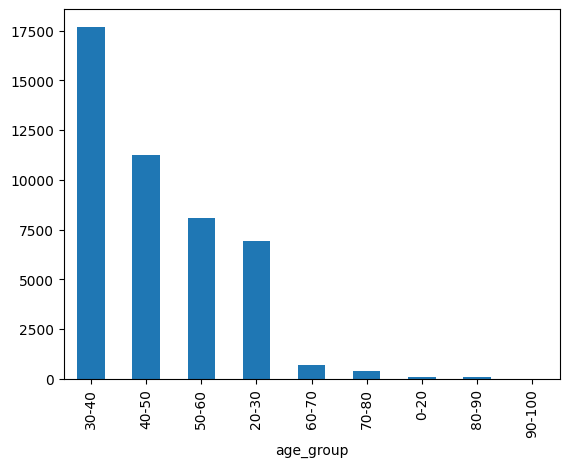

In [81]:
# Answer following questions with the cleaned dataset and chaining methods:
bins=[0,20,30,40,50,60,70,80,90,100]
labels=['0-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']

(bank
 .assign(age_group = lambda x:pd.cut(x.age ,bins=bins ,labels=labels))
# Q1 : What is the distribution of age(in every decade in data set?
 .age_group
 .value_counts()
#  .plot(kind='bar')


# Q2 : What is the relation between age group and balance?
#  .groupby('age_group')
#  .balance
#  .mean()
#  .plot(kind='bar')

#Q3 : What is the relation between marital status and balance?
#   .groupby('marital')
#  .balance
#  .mean()
#  .plot(kind='bar')


# Q4 : What is the relation between education and balance?
#    .groupby('education')
#  .balance
#  .mean()
#  .plot(kind='bar')


# Q5 : What is the relation between job and balance?
#    .groupby('job')
#  .balance
#  .mean()
#  .sort_values( ascending = False)
#  .plot(kind='bar')




# Q6 :  Which job had more default?


# Q7 : Which education level had more default?


)


### USE QUERY INSIDE PANDAS
when we have a lot of conditions, we can use query method to make our code more readable and efficient. <br>

### Q1: select rows  with balance between 10000 and 20000

In [ ]:
# select rows  with balance between 10000 and 20000
(bank
 #way 1
 .query('balance > 10000 and balance < 20000')
 # way 2
# .loc[(bank.balance > 10000) & ( bank.balance <20000) ]

# .balance
#  .max()

)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34,51,management,married,tertiary,0,10635,1,0,cellular,5,may,336,1,-1,0,NaN,0
69,35,blue-collar,single,secondary,0,12223,1,1,cellular,5,may,177,1,-1,0,NaN,0
1236,34,entrepreneur,married,tertiary,0,10350,1,0,cellular,8,may,187,3,-1,0,NaN,0
2065,55,retired,married,secondary,0,18722,1,0,cellular,12,may,128,2,-1,0,NaN,0
2479,59,management,divorced,primary,0,13308,1,0,cellular,13,may,131,1,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45075,28,technician,single,tertiary,0,11862,0,0,cellular,21,oct,549,2,238,13,other,1
45097,61,self-employed,married,tertiary,0,10861,0,0,cellular,25,oct,225,1,91,5,success,1
45098,44,technician,single,secondary,0,11115,0,0,cellular,25,oct,189,1,185,4,success,0
45118,78,retired,married,primary,0,14204,0,0,cellular,26,oct,150,1,183,1,other,0


In [ ]:
# Select rows with balance between 10000 and 20000 and age between 30 and 40 and job is admin or management
(bank
 .query('balance > 10000 and balance < 20000 and age > 30 and age < 40 and job in ("admin.","management")')
.job
 .value_counts()
# .nunique()
)

job
management    66
admin.        14
Name: count, dtype: int64

In [ ]:
## Parctice: Select rows with age between 30 and 40 and job is admin or management and had default

#### Simplify Join in Pandas

<img src='https://github.com/h0ssein2011/Pydata_Yerevan_22/blob/main/img/SQL_JOINS_V2.png?raw=true'>

#### Concat
#### Merge
#### Join

In [91]:
# read Bike Sharing Dataset
bike_url = 'https://raw.githubusercontent.com/h0ssein2011/Pycon_Estonia_2023/main/data/Bike_demand.csv'
bike = pd.read_csv(bike_url)
bike.head()


,dteday,registered,cnt
0,01-01-2018,654,985
1,02-01-2018,670,801
2,03-01-2018,1229,1349
3,04-01-2018,1454,1562
4,05-01-2018,1518,1600


In [92]:
# read Calendar Dataset
calendar_url = 'https://raw.githubusercontent.com/h0ssein2011/Pycon_Estonia_2023/main/data/Calendar_data.csv'
calendar = pd.read_csv(calendar_url)
calendar.head()


,dteday,season,yr,mnth,holiday,weekday,workingday
0,01-01-2018,1,0,1,0,6,0
1,02-01-2018,1,0,1,0,0,0
2,03-01-2018,1,0,1,0,1,1
3,04-01-2018,1,0,1,0,2,1
4,05-01-2018,1,0,1,0,3,1


In [93]:
# read Weather Dataset
weather_url = 'https://raw.githubusercontent.com/h0ssein2011/Pycon_Estonia_2023/main/data/weather_data.csv'
weather = pd.read_csv(weather_url)
weather.head()


,dteday,weathersit,temp,atemp,hum,windspeed
0,01-01-2018,2,14.110847,18.18125,80.5833,10.749882
1,02-01-2018,2,14.902598,17.68695,69.6087,16.652113
2,03-01-2018,1,8.050924,9.47025,43.7273,16.636703
3,04-01-2018,1,8.200000,10.60610,59.0435,10.739832
4,05-01-2018,1,9.305237,11.46350,43.6957,12.522300


### use Merge to combine two dataframes Then: <br>

Answer the following questions: <br>
Q1 : What is the trend of bike demand over years? <br>
Q2 : Which month(in the whole dataset) had the highest demand for Bikes? <br>
Practice 2 : Is there any relation between temprature and Bike demand? <br>
Practice 3 : Does Holiday affect demand or not? <br>
Practice 4 : Does weathersit affect demand or not? <br>

<Axes: xlabel='date'>

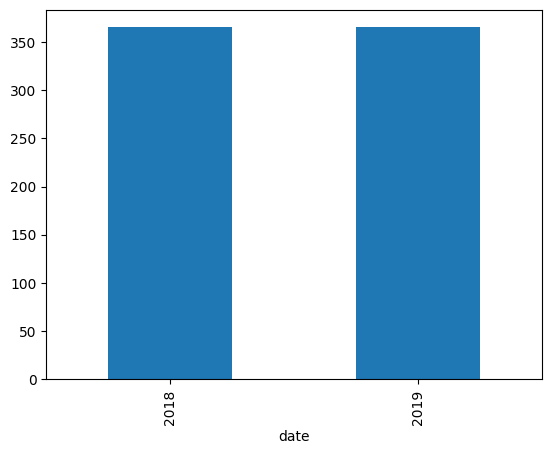

In [ ]:
# Merge Bike_demand and Calendar_date and Weather_data on date
(bike
 .merge(calendar,on='dteday')
  .merge(weather,on='dteday')
  .assign(date = lambda x :pd.to_datetime(x.dteday,format="%d-%m-%Y"))
  # .dtypes

# Q1 : What is the trend of bike demand over years?
 .date.dt.year
 .value_counts()
 .plot(kind='bar')



#Q1 : Which month had the highest demand for Bikes?

# Practice 2 : Is there any relation between temprature and Bike demand?

# Practice 3 : Does Holiday affect demand or not

# Practice 4 : Does weathersit affect demand or not?

)

In [ ]:
bike

,dteday,registered,cnt
0,01-01-2018,654,985
1,02-01-2018,670,801
2,03-01-2018,1229,1349
3,04-01-2018,1454,1562
4,05-01-2018,1518,1600
...,...,...,...
725,27-12-2019,1867,2114
726,28-12-2019,2451,3095
727,29-12-2019,1182,1341
728,30-12-2019,1432,1796


### Use concat to combine two dataframes

In [ ]:
# Create a new dataframe for 2018 data


In [ ]:
# Create a new dataframe for 2019 data


In [ ]:
# Concat 2018 and 2019 dataframes into a single dataframe


### Other useful methods
Here I will bring some useful methods that I use them in my daily work. <br>

- isin() -->  isin() method is used to filter data based on a condition. <br>
- str.contains() --> str.contains() method is used to filter data based on a condition. <br>
- np.where() --> np.where() method is used to filter data based on a condition. <br>
- apply() --> apply() method is used to apply a function on a column. <br>
- map() --> map() method is used to map a value to another value. <br>
- unique() --> unique() method is used to get unique values in a column. <br>
- nunique() --> nunique() method is used to get number of unique values in a column. <br>
- value_counts() --> value_counts() method is used to get number of unique values in a column. <br>
- sort_values() --> sort_values() method is used to sort values in a column. <br>
- sort_index() --> sort_index() method is used to sort index in a column. <br>
- drop_duplicates() --> drop_duplicates() method is used to drop duplicates in a column. <br>
- dropna() --> dropna() method is used to drop null values in a column. <br>
- fillna() --> fillna() method is used to fill null values in a column. <br>
- loc,iloc --> loc,iloc method is used to filter data based on a condition. <br>
...

### Plotly
 introduction and tips and trics how to use it more efficiently

In [5]:
import plotly.express as px



In [15]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
# what is the
(px.histogram
  (bank
   ,x = 'balance'
   ,color = 'marital'
   )
)

In [26]:
# create two samples and compare distribtion of balace between these two groups
sample_1 = bank.sample(int(bank.shape[0] / 2))
sample_2 = bank[~bank.index.isin(sample_1.index)]
print(sample_1.shape , sample_2.shape)



(22605, 17) (22606, 17)


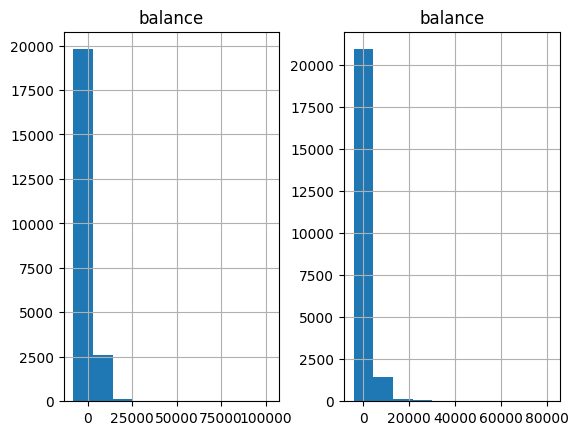

In [34]:
fig, axs = plt.subplots(nrows=1 , ncols = 2 )
sample_1.hist('balance', ax = axs[0])
sample_2.hist('balance', ax = axs[1])
fig.show()

In [38]:
samples = [sample_1 ,sample_2 ]
for  i , sample  in enumerate(samples):
    fig = px.histogram(sample ,x = 'balance',color = 'marital')
    fig.update_layout(xaxis_range=[0,100_000])
    fig.show()

In [42]:
# can we make it easier?
# combine both dataframe
sample_1['sample'] = '1'
sample_2['sample'] = '2'

new_df = pd.concat([sample_1,sample_2])

new_df.head()

<ipython-input-42-64c752e37458>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,sample
33162,34,management,single,tertiary,no,556,yes,no,cellular,20,apr,143,2,-1,0,unknown,no,1
36129,42,admin.,married,secondary,no,-396,yes,no,cellular,11,may,80,1,308,4,failure,no,1
40009,37,technician,married,secondary,no,6384,yes,yes,cellular,3,jun,254,1,96,2,failure,no,1
7113,39,technician,married,secondary,no,192,yes,yes,unknown,29,may,217,5,-1,0,unknown,no,1
20948,40,management,married,tertiary,no,8902,yes,no,cellular,14,aug,464,5,-1,0,unknown,no,1


In [45]:
px.histogram(new_df,x = 'balance',color = 'marital',facet_row = 'sample')